# Aprendizaje estadístico y optimización matemágica

## De aprendizaje automático a optimización matemática

Los algoritmos de **machine learning** de tipo **supervisado** son aquellos que estiman una **función $\hat{f}$ de mapeo** entre las variables de entrada y una variable de salida. 

Recordemos que esta función $\hat{f}$ es una función que no tiene por qué ser la función real si no una aproximación que nos de unos **resultados de predicción aceptables** para el caso de uso sobre el que estemos entrenando el algoritmo.

Si nos regimos bajo ese paradigma, podemos entender entonces que **dado un modelo inicial en función de unos parametros**, podemos simplificar **el proceso de aprendizaje** a encontrar esos **parametros que nos minimizan el error** que cometemos al comparar las predicciones con el resultado esperado.

Pasamos entonces de un problema de aprendizaje estadístico a un problema de **optimización matemática** de la expresión del error que cometemos en las predicciones de forma que se minimize el error global sobre todo el dataset.


## Función de perdida y de coste

Con tal de poder resolver el problema de optimización para minimizar cuanto nos equivocamos necesitamos una expresión matemática sobre la que podamos operar. A la función de error para una instancia de entrenamiento, es decir, a la que aplica a un sola dupla **características - objetivo**, o sea ($X - y$), la llamaremos función de perdida (en inglés, *loss function*). Por otro lado, cuando **agreguemos** esa función a nivel de todo el dataset de entrenamiento, la llamaremos función de coste (en inglés, **cost function**).

> **Función de perdida**  $L(\hat{f}(\omega), y)$
> 
> Error de una instancia de entrenamiento
>



> **Función de Coste** $J(\omega)$
>
> Error medio para todo el dataset de entreno. Se calcula agregando la funcion de perdida, por ejemplo la media de los errores sobre todo el dataset

Esta función puede tomar varias formas y sobre todo dependerá de la tarea a realizar, si es regresión o clasificación.

## Optimización de la función de coste

Una vez determinada una función de coste en función de los parametros de nuestro algoritmo, la optimización de esta función nos dara los parámetros de nuestro modelo
que nos reducen el error de predicción.

Si bien dependiendo de la función de coste la optimización se puede hacer de forma analític, una de las técnicas más extendidas de optimización en el campo del aprendizaje automático es el **descenso de gradiente**.

### Descenso de gradiente

El **gradiente de una función** puede ser interpretado como el vector que nos indica la dirección y ratio con el que la función aumenta en un determinado punto.

Sabemos que en los mínimos y máximos, tanto locales como globales, de una función el gradiente será igual a cero. El **descenso de gradiente** consiste precisamente en acercarse de forma iterativa a uno de esos mínimos moviendonos en la dirección contraria a la que nos indica el gradiente en un punto para unos parámetros dados.

![gradient](./img/gradient.jpeg)

Matemáticamente, esto se puede escribir cómo:

$$\omega_{i+1} = \omega_{i} - \alpha \times \frac{\partial J(\omega_i)}{\partial \omega}$$

> Atención al signo negativo: siempre querremos movernos en la dirección opuesta al gradiente.

Si iteramos sobre la expresión anterior a partir de unos pesos $\omega$ inicializados aleatoriamente, nos acercaremos al mínimo en cada paso de manera proporcional al gradiente, que irá disminuyendo a medida que nos acerquemos al mínimo, y al hiperparametro $\alpha$. Este hiperparametro permite ajustar la velocidad a la que el descenso de gradiente se acerca al mínimo global y será una de las principales palancas de acción sobre el entrenamiento sobre la que podremos jugar para poder encontrar el mínimo de la función de coste.

## Conclusión

El descenso de gradiente es una técnica muy presente en el campo del aprendizaje automático, especialmente en el aprendizaje profundo. Esta técnica nos permite optimizar la función de coste del algoritmo de forma que encontremos los parametros que minimizan el error en las predicciones. En resumen, la dinámica se resume en:


1. Encontrar la función de coste del algoritmo

2. Encontrar la el gradiente de la función de coste

3. Aplicar el descenso de gradiente evaluando el dataset de entrenamiento en el gradiente de la función de coste.

# Caso práctico: Regresión lineal

Vamos a ver la aplicación del descenso de gradiente sobre una regresión lineal

Función real: las observaciones son fruto de una función desconocida $f$ más un error $\epsilon$

$$ y = f(x) + \epsilon $$

**Hipótesis:**

Función a estimar f(x) es lineal, planteamos entonces:

$$ \hat{y} = \hat{f}(x) = \theta_0 + \theta_1 x \qquad (1)$$   

## Función de coste

Con la relación (1), teniendo los valores de la variable dependiente x y su observacion y para varios registros, podemos plantear las función de error y de coste cómo:


$$ L_i(\theta_0, \theta_1) = (\hat{f}(x_i) - y_i)^2 = ((\theta_0 + \theta_1 x_i) - y_i)^2 $$

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^m_i L_i(\theta_0, \theta_1) = \frac{1}{2m}\sum^m_i ((\theta_0 + \theta_1 x) - y_i)^2 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

## Ex1 - Dataset de entrenamiento

Vamos a generar un dataset sintetico de forma que siga una relacion lineal:

$$y = \theta_0 x_0 + \theta_1 x_1 $$ 

> Recordad que x_0 es 1 ( un vector de unos) que se utiliza para poder expresar la función lineal de forma vectorial

Esta será la función que querremos aproximar

In [3]:
## Declara las variables theta_0 y theta_1

In [4]:
theta_0 = 2
theta_1 = 4

In [5]:
## Genera un dataset aleatorio

np.random.seed(42)

X_1 = np.random.normal(0, 1, size=(100, 1))
X_0 = np.ones_like(X_1)

error = np.random.normal(0, 1, size=(100, 1))

y = theta_0 * X_0 + theta_1*X_1 + error

#### Vamos a graficar nuestros datos para comprobar la relacion de y ~ X

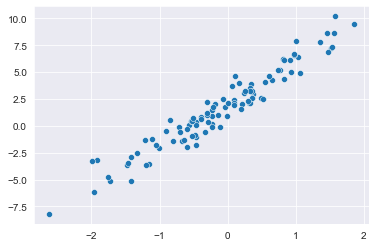

In [6]:
ax = sns.scatterplot(y=y[:,0], x=X_1[:,0])

## Ex2 - Solución analítica

Dado que la función de coste puede resolverse de forma analítica, vamos a resolverla para encontrar los valores de $\theta$ y poder comparar con los valores que obtenemos con gradient descent

Recordamos que la solución anlítica viene dada de forma matricial como:


$$\theta = [\theta_0, \theta_1] = (X^TX)^{-1}X^Ty$$

[derivacion](https://towardsdatascience.com/analytical-solution-of-linear-regression-a0e870b038d5)

In [7]:
## Juntamos los dos vectores en una matrix. Recuerda que X_0 = [1, ...,1] ya que multiplica a la theta_0 (ordenada en el origen)

X = np.hstack([X_0, X_1])

In [8]:
## calculamos la transpuesta

X_t = X.T

In [9]:
## calculamos el resultado del producto de la transpuesta y multiplicamos por la transpuesta otra vez

XtX = X_t.dot(X)
XtX_inv = np.linalg.inv(XtX)
XtX_invXt = XtX_inv.dot(X_t)

In [10]:
## Finalmente, multiplicamos por las y's conocidas
theta_est = XtX_invXt.dot(y)

print(theta_est)

[[2.00742783]
 [3.85674284]]



## Finalmente, vamos a plottear el resultado para comparar la linea real con la estimada

<AxesSubplot:>

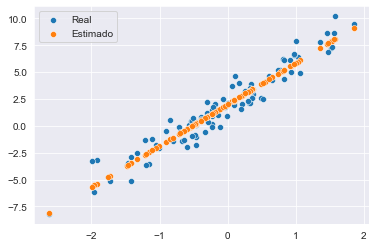

In [11]:
## Graficamos los datos de entrenamiento

ax = sns.scatterplot(y=y[:,0], x=X_1[:,0], label='Real')

## Creamos una y estimada a partir de los datos de X y de theta_est
y_hat = X.dot(theta_est)

sns.scatterplot(y=y_hat[:, 0], x=X[:, 1], label='Estimado')

## Calcular el error


In [12]:
error = (y_hat - y)
sum_squared_error = error.T.dot(error)
mean_squared_error = sum_squared_error / error.shape[0]

In [13]:
print(mean_squared_error)

[[0.88363248]]


Vemos que los valores obtenidos son aproximados a los reales que hemos impuesto a principio del ejercicio.

Al ser la solución analítica, es la solución óptima a la que querremos acercarnos via el descenso de gradiente.

Destacar que **nunca** podremos llegar a una estimación perfecta de los parametros reales debido a la presencia de ruido en nuestras mediciones.

# Descenso de gradiente

A continuación se muestra la derivación de la función de coste sobre la cual aplicaremos el método de descenso de gradiente.

**Función de coste**

$$J(\theta_0, \theta_1) = \frac{1}{2m}\sum^m_i L_i(\theta_0, \theta_1) = \frac{1}{2m}\sum^m_i ((\theta_0 + \theta_1 x) - y_i)^2 $$

**Gradientes**


$$ \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} = \frac{1}{m}\sum_{i=1}^{m}((\theta_0 + \theta_1 x) - y_i)) $$

$$ \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} = \frac{1}{m}\sum_{i=1}^{m}((\theta_0 + \theta_1 x_i) - y_i))x_i $$

**Descenso de gradiente**

$$\theta_0^{t+1} := \theta_0^t - \alpha \times \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0}$$

$$\theta_1^{t+1} := \theta_1^t - \alpha \times \frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1}$$

## Ex-1: Crea una función que calcule el coste de la función

In [14]:
def cost_j(theta_0: float, theta_1: float, X: np.array, y: np.array) -> float:
    """Calcula el error cuadrático medio
    """
    y_pred = theta_0 + theta_1*X
    coste = y_pred - y
    coste_quad = coste.T.dot(coste) ## Esto se puede escribir como np.sum(np.square(y_pred - y))
    coste_quad_medio = coste_quad / (2*coste.shape[0])
    return float(coste_quad_medio)

# Ex-2: Crea una función que devuelva una tupla con los gradientes parciales para $\theta_0$ y $\theta_1$

In [15]:
def gradiente(theta_0: float, theta_1: float, X: np.array, y: np.array) -> float:
    m = len(y)
    y_pred = theta_0 + theta_1*X
    z = y_pred - y
    grad_theta_0 = np.sum(z)/m
    grad_theta_1 = float(z.T.dot(X)/m)
    return grad_theta_0, grad_theta_1

In [16]:
gradiente(1000,600, X_1, y)

(936.0851710460702, 389.555015691061)

#### Ex-3: Inicializa aleatoriamente $\theta_0$ y $\theta_1$ y aplica el algoritmo de descenso de gradiente

In [17]:
## Inicalizacion de parametros
theta_0 = -0.01
theta_1 = -0.04

## Selección de hiperparametros

alpha = 0.01
num_iteraciones = 1000

training_report = []

for it in range(num_iteraciones):
    # calculamos el coste
    coste = cost_j(theta_0, theta_1, X_1, y)

    # calculamos el gradiente
    grad_theta_0, grad_theta_1 = gradiente(theta_0, theta_1, X_1, y)

    # Actualizamos los parametros theta
    theta_0 = theta_0 - alpha*grad_theta_0
    theta_1 = theta_1 - alpha*grad_theta_1

    ## Añadir info al informe

    # Crea un diccionario con la información
    tmp_report = {'iteracion':it,
                  'theta_0': theta_0,
                  'theta_1': theta_1,
                  'coste': coste}

    training_report.append(tmp_report)

In [18]:
df_training_report = pd.DataFrame(training_report)

In [19]:
df_training_report.tail(1)

,iteracion,theta_0,theta_1,coste
999,999,2.006673,3.855145,0.441817


<AxesSubplot:xlabel='iteracion'>

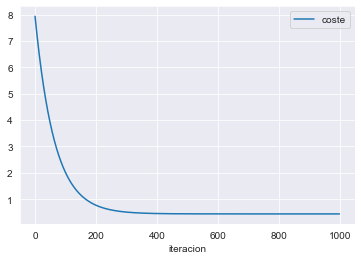

In [20]:
df_training_report[['iteracion', 'coste']].plot(kind='line', x='iteracion', y='coste')

## Ejercicios:

1 - Encapsula la lógica en una funcion que tome como argumentos: `alpha, num_iteraciones, X, y` y realiza varios experimentos con distintos learning rates e iteraciones

2 - La lógica anterior usa todos los datos disponibles para entrenar el modelo. Cómo se llama a este tipo de entrenamiento ?

3 - Modifica la funcion en el ejercicio 1 de forma que se pueda especificar el tamaño del batch de entrenamiento